# Hand written digit recognizer

In [31]:
import os

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 

In [32]:
# Load Dataset
(Xtrain,Ytrain),(Xtest,Ytest)=mnist.load_data()

In [33]:
# Summarize loaded dataset
print('Train: X=%s, y=%s'%(Xtrain.shape,Ytrain.shape))
print('Test: X=%s, y=%s'%(Xtest.shape,Ytest.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [34]:
type(Xtrain)

numpy.ndarray

In [35]:
Xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [36]:
Xtrain[0].shape

(28, 28)

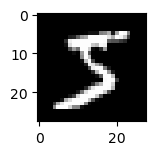

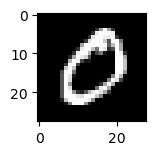

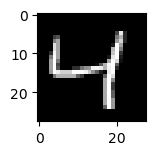

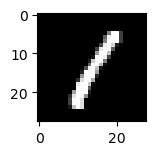

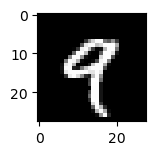

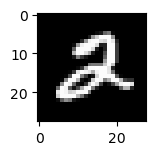

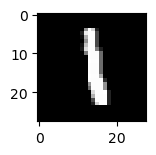

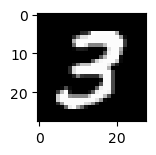

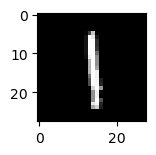

In [37]:
# Plot first few images
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(Xtrain[i],cmap=plt.get_cmap('gray'))
    plt.show()

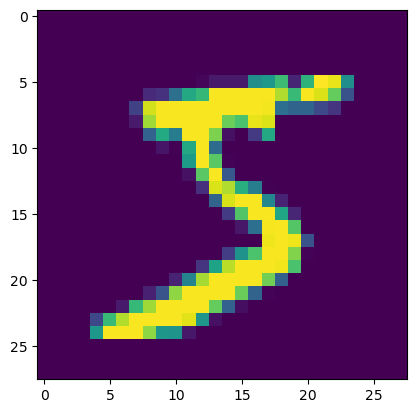

5


In [38]:
# Displaying the image with label
plt.imshow(Xtrain[0])
plt.show()
#print the corresponding label
print(Ytrain[0])

In [39]:
print(Ytrain.shape,Ytest.shape)

(60000,) (10000,)


In [40]:
print(np.unique(Ytrain))
print(np.unique(Ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [41]:
#Scaling the values
Xtrain=Xtrain/255
Xtest=Xtest/255

In [42]:
print(Xtrain[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [43]:
# Setting up the layers of the neural network
""" 
softmax is used for multi class classification models. It is often used 
as the last activation function of a neural network to normalize
the output of a network to a probability distribution over 
predicted output classes

"""
from keras.models import Sequential

model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
    
                        ])

<p>A rectified linear unit(ReLU) is an activation function that introduces<br>the property of nonlinearity to a deep leanring mode.</p>

In [44]:
# Compiling the neural network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
# Training the neural network
model.fit(Xtrain,Ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2901 - accuracy: 0.9175
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1328 - accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0982 - accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0812 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0573 - accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0499 - accuracy: 0.9849
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

In [46]:
loss,accuracy=model.evaluate(Xtest,Ytest)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9758
0.9757999777793884


In [47]:
Ypred=model.predict(Xtest)

313/313 [==============================] - 1s 2ms/step


In [48]:
print(Ypred.shape)

(10000, 10)


In [49]:
print(Ypred[0])

[6.9112112e-12 6.5907089e-13 8.4326906e-08 7.0724624e-08 6.3443764e-14
 4.2794025e-11 3.9445828e-18 9.9999976e-01 6.1104699e-10 2.7802607e-11]


In [50]:
# Converting the prediction probabilities to class label
label_for_first_test_image=np.argmax(Ypred[0])
print(label_for_first_test_image)

7


In [51]:
# Converting the prediction probabilities to class label for all test data points
Y_pred_labels=[np.argmax(i) for i in Ypred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [52]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Ytest,Y_pred_labels)

In [53]:
print(conf_mat)

[[ 962    0    1    2    1    1    6    1    6    0]
 [   0 1125    2    2    0    0    2    1    3    0]
 [   6    1 1005    5    1    1    3    4    6    0]
 [   0    0    3  992    0    8    0    2    3    2]
 [   1    0    4    0  952    0    7    5    0   13]
 [   5    0    0    9    1  868    1    1    5    2]
 [   3    2    2    1    1    5  937    2    5    0]
 [   2    5    8    2    0    0    0  998    3   10]
 [   2    0    3   14    3    2    1    3  942    4]
 [   4    3    0    8    5    1    0    5    6  977]]
